In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import svd

# Setting up variables

In [67]:
imgFolder    = './images'
outputFolder = './output'
imgList      = []
k = 20

# Creating output folder and filling image array

In [68]:
# Create output folder if there isnt already one
if os.path.isdir(os.path.join('./output')) == False:
    os.makedirs(os.path.join('./output'))

In [69]:
imgList.clear()
for image in os.listdir(imgFolder):
    imgSrc = os.fsdecode(image)
    imgList.append(imgSrc)

## SVD compression functions

In [70]:
def truncateSVD(A, k):
    U, S, Vt = svd(A)
    Ak = np.dot(U[:,:k],np.dot(np.diag(S[:k]),Vt[:k,:]))
    return Ak

def compressImg(img,k):
#   Send img to matrix
    imgMatrix = np.array(list(img.getdata(band=0)))
    imgMatrix.shape = (img.size[1],img.size[0])
    imgMatrix = np.matrix(imgMatrix) 
#   Compress with SVD
    compressedMatrix = truncateSVD(imgMatrix,k)
#   Convert back to img
    compressedImg = Image.fromarray(compressedMatrix)
    return compressedImg

# Compressing images

In [71]:
for image in imgList:
#     Resize image and send to grayscale
    imgData = Image.open(imgFolder + '/' +  image).convert('L').resize((400,400),Image.LANCZOS)
#     Compress
    newImg = compressImg(imgData,k)
#     Save to output folder
    newImg = newImg.convert('RGB')
    newImg.save(outputFolder + '/' + image)

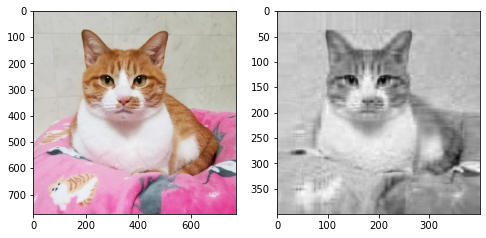

In [72]:
fig, (subfig0, subfig1) = plt.subplots(1,2, figsize=(8,6))
subfig0.imshow(Image.open(imgFolder + '/0.jpg'))
subfig1.imshow(Image.open(outputFolder + '/0.jpg'))
plt.show()